In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report
import seaborn as sns
from scipy import stats

### most of this part was contributed by Kevin and Ben

In [7]:
cd tmp

/home/team9/tmp


In [8]:
ls

data/


In [9]:

cd data

/home/team9/tmp/data


# Clean the data

In [10]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=";", parse_dates=[1])


In [11]:
weather_trips = pd.read_csv('weather_trips.csv')

In [7]:
weather_trips

,Unnamed: 0,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n
1,1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n
2,2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n
3,3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n
4,4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n
...,...,...,...,...,...,...,...,...
26275,26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n
26276,26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n
26277,26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n
26278,26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n


In [8]:
weather_trips = weather_trips.drop(columns=["Unnamed: 0"])


In [9]:
weather_trips.head(3)

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
0,1483228800,5.39,9999.0,5.1,Rain,moderate rain,10n
1,1483232400,5.39,9999.0,4.1,Rain,moderate rain,10n
2,1483236000,5.39,9999.0,4.1,Rain,light rain,10n


In [10]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


In [11]:
trips.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2.182637e+06,2.182637e+06,2.182637e+06,2.182637e+06,2.045430e+06,2.018086e+06,0.0,4333.0,4330.000000
mean,7.149479e+06,1.504103e+00,5.507875e+04,5.153329e+04,5.506239e+04,5.170612e+04,NaN,0.0,237554.867667
std,7.314423e+05,4.999833e-01,1.742482e+04,1.757164e+04,1.733870e+04,1.752695e+04,NaN,0.0,34585.051789
min,5.955221e+06,1.000000e+00,1.820300e+04,1.620000e+04,1.754600e+04,1.597400e+04,NaN,0.0,177856.000000
25%,6.592584e+06,1.000000e+00,3.968300e+04,3.600000e+04,3.966800e+04,3.651800e+04,NaN,0.0,205506.500000
50%,7.110090e+06,2.000000e+00,5.527600e+04,5.160000e+04,5.518900e+04,5.161800e+04,NaN,0.0,233851.500000
75%,8.018241e+06,2.000000e+00,6.900600e+04,6.516000e+04,6.901900e+04,6.539800e+04,NaN,0.0,271506.750000
max,8.592207e+06,2.000000e+00,9.168000e+04,8.760000e+04,9.437800e+04,9.717700e+04,NaN,0.0,297899.000000


## remove null values for trips

In [12]:
haveDepTime = trips[trips["ACTUALTIME_DEP"].notnull()]
haveDep_ArrTime = haveDepTime[haveDepTime["ACTUALTIME_ARR"].notnull()]
haveDep_ArrTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,"
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,"
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,"
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"


In [13]:
print(trips.shape[0] - haveDep_ArrTime.shape[0], 'trips are missing either actual departure or arrival times')

289270 trips are missing either actual departure or arrival times


In [14]:
trips.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

- 360 days of service - seems to be one for every day
- only 650k trip IDs but over 2 million lines - need to see why 

In [15]:
trips.loc[trips['TRIPID']==6765486]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
470885,DB,2018-05-17,6765486,33D,33D_62,2,29460,26400,30676.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:42:42,",3077688,"
2071391,DB,2018-05-18,6765486,33D,33D_62,2,29460,26400,29846.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:52:33,",3077688,"
2172425,DB,2018-05-16,6765486,33D,33D_62,2,29460,26400,30102.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:32:53,",3077688,"
2179562,DB,2018-05-15,6765486,33D,33D_62,2,29460,26400,30403.0,26416.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3077688,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"


Looks like the trip IDs are sometimes duplicated but on different days. Need to see if they are ever duplicated on the same day

In [16]:
sub_trips = trips[["DAYOFSERVICE", "TRIPID"]]

In [17]:
print(sub_trips.duplicated().sum(), "duplicated trip IDs on the same day.")

0 duplicated trip IDs on the same day.


Therefore trip ID is never reused on the same day.
- Can use it and day as a unique identifier

In [18]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

Next I will convert the dates to days of the week

In [19]:
trips['DAYOFWEEK'] = trips['DAYOFSERVICE'].dt.weekday

In [20]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,",0


Next I will determine the hour of departure for the trip and the travel time

In [21]:
# dividing by seconds and minutes
trips['HOUR_DEPARTURE'] = trips['ACTUALTIME_DEP'].apply(lambda row: row//3600)

### add new features: real journey time, planned journey time

In [22]:
# getting arrival time minus departure, then dividing by 60 seconds
#trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).apply(lambda row: row/60)
trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP'])

In [23]:
#trips['PLANNED_JOURNEY'] = (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)

In [24]:
#hasNoJourneyTime = trips[trips["PLANNED_JOURNEY"].isnull()]
#hasNoJourneyTime

In [25]:
hasNoJourneyTime = trips[trips["JOURNEY_TIME"].isnull()]
hasNoJourneyTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2,NaN,NaN
21,DB,2018-02-07,6258154,49,49_28,2,79199,76800,NaN,76850.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3010723,",2,21.0,NaN
24,DB,2018-02-07,6246014,123,123_34,1,42848,39600,43203.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2968050,",2,NaN,NaN
34,DB,2018-02-07,6253738,76,76_37,2,58000,55200,59381.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",1866216,",2,NaN,NaN
46,DB,2018-02-18,6270605,41,41_3,1,67311,64200,67296.0,NaN,BasDef,NaN,NaN,NaN,26-FEB-18 11:09:33,",1742993,",6,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182622,DB,2018-05-14,6756429,40D,40D_102,1,66268,63000,66445.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2837991,",0,NaN,NaN
2182623,DB,2018-05-14,6767663,40D,40D_104,2,44194,41400,44430.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2826305,",0,NaN,NaN
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0,13.0,NaN
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0,NaN,NaN


In [26]:
#trips['PLANNED_JOURNEY'].describe()

In [27]:
trips['JOURNEY_TIME'].describe()

count    1.893367e+06
mean     3.853759e+03
std      1.434782e+03
min     -1.486600e+04
25%      2.803000e+03
50%      3.772000e+03
75%      4.845000e+03
max      2.345800e+04
Name: JOURNEY_TIME, dtype: float64

In [28]:
trips.loc[trips['SUPPRESSED']==0.0]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1783,DB,2018-02-18,6269995,45A,45A_60,1,68767,65700,NaN,65746.0,BasDef,NaN,0.0,194642.0,26-FEB-18 11:09:33,",2428302,",6,18.0,NaN
2363,DB,2018-03-16,6399287,41C,41C_78,1,71543,68400,NaN,68643.0,BasDef,NaN,0.0,205589.0,26-MAR-18 12:55:43,",1741586,",4,19.0,NaN
3485,DB,2018-09-28,7758815,13,13_72,2,77076,72000,77726.0,NaN,BasDef,NaN,0.0,271333.0,18-OCT-18 18:30:27,",2589790,",4,NaN,NaN
3873,DB,2018-02-18,6277942,54A,54A_12,2,56910,54000,NaN,53972.0,BasDef,NaN,0.0,194644.0,26-FEB-18 11:09:33,",1752467,",6,14.0,NaN
4353,DB,2018-03-10,6400436,16,16_20,1,66230,61200,NaN,63250.0,BasDef,NaN,0.0,204650.0,19-MAR-18 14:54:09,",1892345,",5,17.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180333,DB,2018-05-15,6756431,40D,40D_101,1,83064,81000,NaN,80899.0,BasDef,NaN,0.0,231822.0,26-JUN-18 09:23:03,",2837996,",1,22.0,NaN
2181600,DB,2018-05-14,6761229,46A,46A_67,2,62024,56880,61946.0,NaN,BasDef,NaN,0.0,231784.0,26-JUN-18 09:13:13,",3064930,",0,NaN,NaN
2181789,DB,2018-05-15,6759169,66,66_13,2,41797,38100,41937.0,NaN,BasDef,NaN,0.0,231826.0,26-JUN-18 09:23:03,",2295846,",1,NaN,NaN
2182138,DB,2018-05-15,6753428,123,123_34,1,60475,56400,60008.0,NaN,BasDef,NaN,0.0,231813.0,26-JUN-18 09:23:03,",3218907,",1,NaN,NaN


In [29]:
trips.loc[trips['SUPPRESSED']==0.0].describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
count,4.333000e+03,4333.000000,4333.000000,4333.000000,2202.000000,2576.000000,0.0,4333.0,4330.000000,4333.000000,2576.000000,791.000000
mean,7.078477e+06,1.386568,54876.179321,51063.752596,54927.642598,51024.471661,NaN,0.0,237554.867667,2.782368,13.685947,4719.309735
std,7.280043e+05,0.487019,14723.724563,14726.980330,14974.037460,14625.331959,NaN,0.0,34585.051789,1.876974,4.061992,2056.618225
min,5.955374e+06,1.000000,20621.000000,18900.000000,23058.000000,19069.000000,NaN,0.0,177856.000000,0.000000,5.000000,19.000000
25%,6.394961e+06,1.000000,42748.000000,39600.000000,43299.250000,38748.250000,NaN,0.0,205506.500000,1.000000,10.000000,3295.500000
50%,6.871374e+06,1.000000,55253.000000,51300.000000,56069.000000,49778.500000,NaN,0.0,233851.500000,3.000000,13.000000,4278.000000
75%,7.781073e+06,2.000000,66311.000000,62400.000000,66084.000000,62684.250000,NaN,0.0,271506.750000,4.000000,17.000000,5958.500000
max,8.591894e+06,2.000000,88164.000000,84600.000000,87978.000000,84607.000000,NaN,0.0,297899.000000,6.000000,23.000000,12052.000000


Not sure why there would be a negative - will investigate

### Plot the actual journey time, would also need to plot planned time

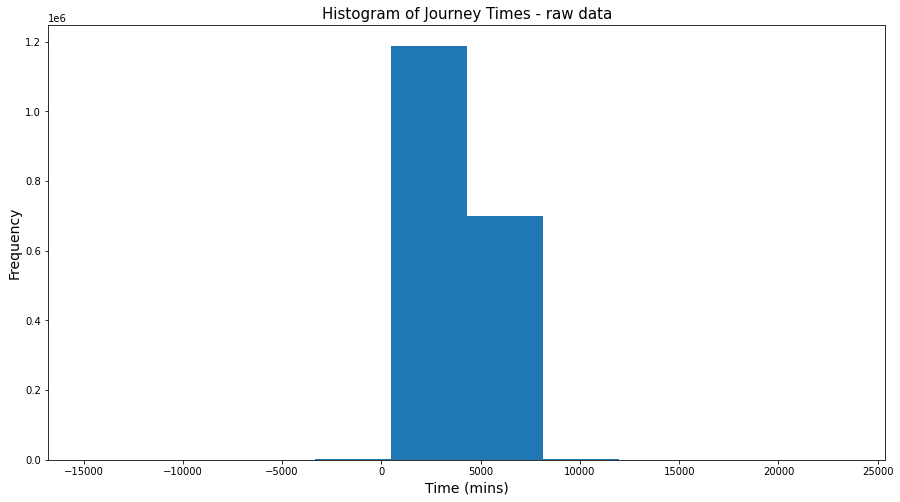

In [30]:
# plotting the journey time data
plt.figure(figsize=(15,8))
plt.title("Histogram of Journey Times - raw data", fontsize=15)
plt.xlabel("Time (mins)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.hist(trips['JOURNEY_TIME'])

plt.show()

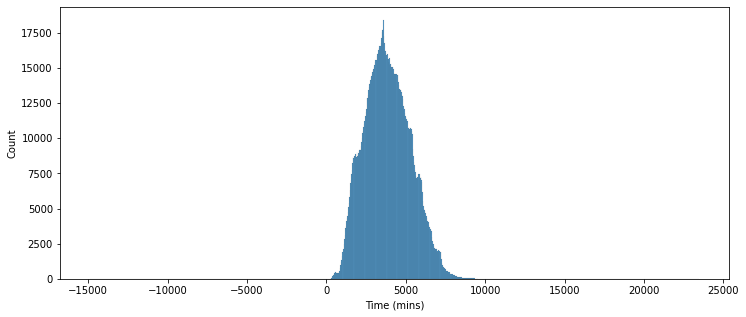

In [31]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(trips['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

# plt.title('Journey Times - raw data')
plt.show()



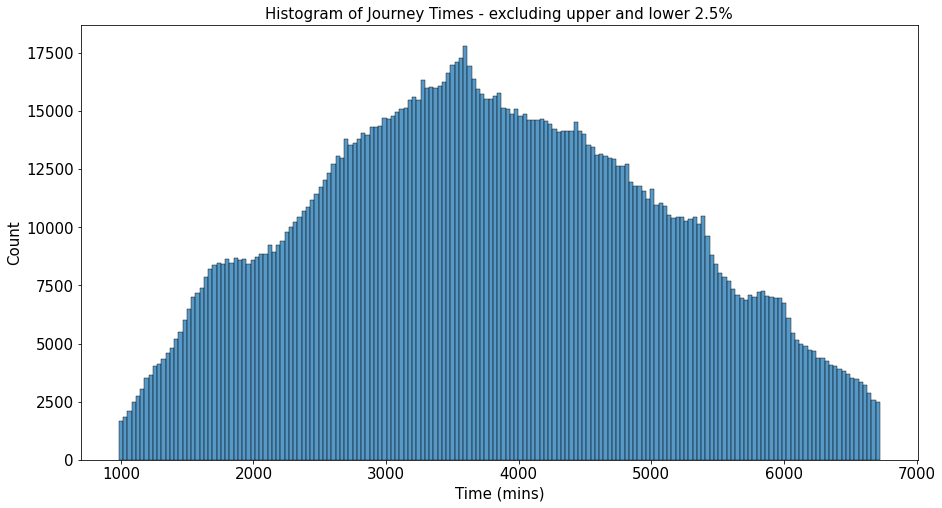

In [32]:
# calculate value 2 standard deviations above the mean
topTwoSDs = trips['JOURNEY_TIME'].mean() + (2*trips['JOURNEY_TIME'].std())
bottomTwoSDs = trips['JOURNEY_TIME'].mean() - (2*trips['JOURNEY_TIME'].std())
tripsNoOutliers = trips.loc[trips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[trips['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Journey Times - excluding upper and lower 2.5%')
plt.show()

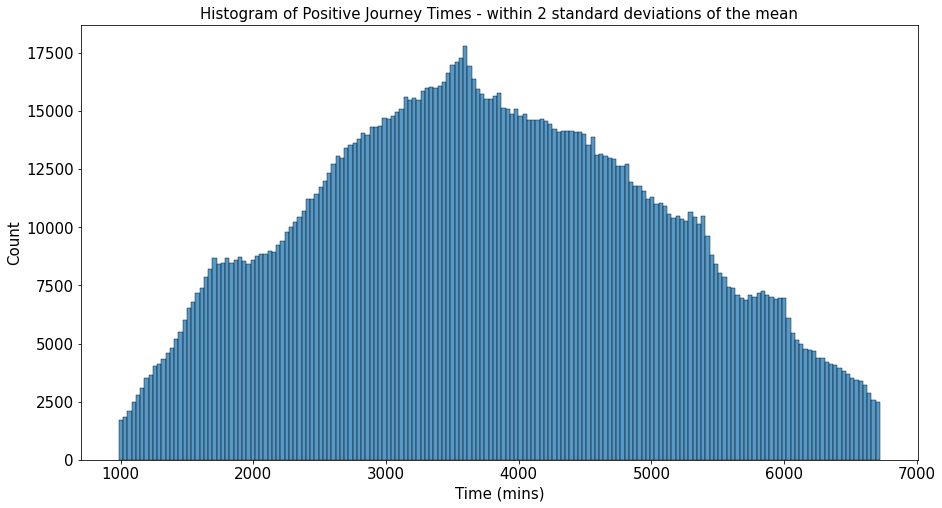

In [33]:
# calculate value 2 standard deviations above the mean
noNegTrips = trips.loc[trips['JOURNEY_TIME'] > 0]
topTwoSDs = noNegTrips['JOURNEY_TIME'].mean() + (2*noNegTrips['JOURNEY_TIME'].std())
bottomTwoSDs = noNegTrips['JOURNEY_TIME'].mean() - (2*noNegTrips['JOURNEY_TIME'].std())
tripsNoOutliers = noNegTrips.loc[noNegTrips['JOURNEY_TIME'] < topTwoSDs]
tripsNoOutliers = tripsNoOutliers.loc[tripsNoOutliers['JOURNEY_TIME'] > bottomTwoSDs]



fig, ax = plt.subplots(figsize=(15,8))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

plt.title('Histogram of Positive Journey Times - within 2 standard deviations of the mean')
plt.show()

In [34]:
print(tripsNoOutliers['JOURNEY_TIME'].max())
print(tripsNoOutliers['JOURNEY_TIME'].min())

6722.0
986.0


In [35]:
bottomTwoSDs

985.8330802392265

In [36]:
# 0.2*60 = 12
noNegTrips.loc[noNegTrips['JOURNEY_TIME']<12]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
1121264,DB,2018-03-22,6394554,43,43_88,2,70675,68400,71702.0,71701.0,BasDef,NaN,NaN,NaN,04-APR-18 08:59:06,",2632952,",3,19.0,1.0
1939153,DB,2018-11-14,8121047,33A,33A_22,1,64398,61200,65607.0,65606.0,BasDef,NaN,NaN,NaN,22-NOV-18 13:39:08,",1734800,",2,18.0,1.0
2166184,DB,2018-01-02,5963180,44B,44B_60,1,29686,27900,29370.0,29367.0,BasDef,NaN,NaN,NaN,09-JAN-18 20:18:05,",1720843,",1,8.0,3.0


Seems as though these rows should be dropped

- First I will remove those journeys below 0
- I will then remove the top and bottom 2.5% from each route in each direction individually, so as to ensure the uniqueness of each route is preserved -> some routes are much longer than others and so on

I will need to create a new column for each route in each direction. This is done below.

### remove outliers

In [37]:
trips = trips.loc[trips['JOURNEY_TIME']>0]
trips.loc[trips["JOURNEY_TIME"].isnull()]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME


In [38]:
# 10 * 60 = 600
shorts = trips.loc[trips['JOURNEY_TIME']<600]

In [39]:
shorts.nunique()

DATASOURCE            1
DAYOFSERVICE        314
TRIPID             1256
LINEID               50
ROUTEID              72
DIRECTION             2
PLANNEDTIME_ARR     678
PLANNEDTIME_DEP      93
ACTUALTIME_ARR     2429
ACTUALTIME_DEP     2140
BASIN                 1
TENDERLOT             0
SUPPRESSED            1
JUSTIFICATIONID       7
LASTUPDATE          314
NOTE                163
DAYOFWEEK             7
HOUR_DEPARTURE       18
JOURNEY_TIME        347
dtype: int64

- check online found that ther atually were routes which were extremely short (eg 185) so it is difficult to tell which pieces of data are wrong.
- clear that not all are valid though as the second line from the bottom is the 46a which is a long route.


Once I have the data split into the bus routes I will remove the top and bottom 2.5% from each

In [40]:
# 5 * 60 = 300
print(len(trips.loc[trips['JOURNEY_TIME']<300]))

67


In [41]:
short_5 = trips.loc[trips['JOURNEY_TIME']<300]

In [42]:
short_5

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
41164,DB,2018-12-30,8585049,41C,41C_83,1,74734,72000,72379.0,72328.0,BasDef,NaN,NaN,NaN,16-JAN-19 18:16:31,",3378321,",6,20.0,51.0
93542,DB,2018-02-06,6256812,111,111_10,2,84911,84600,84861.0,84568.0,BasDef,NaN,NaN,NaN,28-FEB-18 11:48:21,",2789836,",1,23.0,293.0
96152,DB,2018-10-12,8019985,77A,77A_29,1,83101,79200,82931.0,82813.0,BasDef,NaN,NaN,NaN,20-NOV-18 15:30:07,",2965213,2965213,",4,23.0,118.0
101351,DB,2018-01-15,6120858,111,111_10,2,84951,84600,84856.0,84578.0,BasDef,NaN,NaN,NaN,23-JAN-18 10:24:03,",2789836,",0,23.0,278.0
137971,DB,2018-03-20,6402084,111,111_10,2,84981,84600,84871.0,84597.0,BasDef,NaN,NaN,NaN,28-MAR-18 15:03:15,",2789836,",1,23.0,274.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090487,DB,2018-04-02,6590622,17A,17A_13,2,68376,64800,68602.0,68358.0,BasDef,NaN,NaN,NaN,10-APR-18 15:19:02,",1722094,1722094,",0,18.0,244.0
2102508,DB,2018-11-01,8068163,150,150_8,1,75603,73800,76167.0,75920.0,BasDef,NaN,NaN,NaN,29-NOV-18 07:38:40,",2961346,2961346,",3,21.0,247.0
2148455,DB,2018-05-22,6782309,4,4_10,1,60314,55800,60885.0,60845.0,BasDef,NaN,NaN,NaN,13-JUN-18 18:52:05,",2615620,2615620,",1,16.0,40.0
2157391,DB,2018-05-28,6846997,185,185_57,2,56855,56400,56393.0,56099.0,BasDef,NaN,NaN,NaN,14-JUN-18 13:31:37,",2817949,",0,15.0,294.0


- noticeably less routes under 5 minutes and upon inspection some of the routes (111, 44b, 4, 41c )on moovit it was clear that they were corrupted data

In [43]:
trips = trips.loc[trips['JOURNEY_TIME']>300]

Below I am creating a new categorical column, with each category representing a route in a particular direction

In [44]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2,23.0,2924.0
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2,8.0,4247.0
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2,15.0,4020.0
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2,22.0,3074.0
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,",2,10.0,4481.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,",0,8.0,1363.0
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,",0,18.0,1455.0
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,",0,7.0,2830.0
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0,16.0,3506.0


- before splitting into seperate routes to analyse I'm removing unnecessary columns and adding the weather data.

In [45]:
trips = trips.drop({'TENDERLOT', "JUSTIFICATIONID", "DATASOURCE", "LASTUPDATE", "NOTE","BASIN", "ROUTEID"}, axis=1)


In [46]:
trips

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,2018-02-07,6253783,68,1,87245,84600,87524.0,84600.0,NaN,2,23.0,2924.0
2,2018-02-07,6254942,45A,2,35512,32100,36329.0,32082.0,NaN,2,8.0,4247.0
3,2018-02-07,6259460,25A,1,57261,54420,58463.0,54443.0,NaN,2,15.0,4020.0
4,2018-02-07,6253175,14,1,85383,81600,84682.0,81608.0,NaN,2,22.0,3074.0
5,2018-02-07,6248240,77A,2,41648,37200,42019.0,37538.0,NaN,2,10.0,4481.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,2018-05-14,6765652,53,2,30626,29100,30482.0,29119.0,NaN,0,8.0,1363.0
2182630,2018-05-14,6765662,53,2,65950,64800,66270.0,64815.0,NaN,0,18.0,1455.0
2182631,2018-05-14,6765828,45A,1,28647,25800,28688.0,25858.0,NaN,0,7.0,2830.0
2182632,2018-05-14,6765849,123,2,61560,57840,61365.0,57859.0,NaN,0,16.0,3506.0


In [47]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [48]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
dtype: object

In [49]:
def date_from_epoch(x):
    y = dt.datetime.fromtimestamp (x).strftime('%Y-%m-%d')
    return y   

weather_trips['DAYOFSERVICE'] = weather_trips['dt'].apply(lambda x: date_from_epoch(x))

In [50]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE
0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n,2017-01-01
1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n,2017-01-01
2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n,2017-01-01
3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n,2017-01-01
4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n,2017-01-01
...,...,...,...,...,...,...,...,...
26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31
26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n,2019-12-31
26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n,2019-12-31
26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31


In [51]:
def round_epoch_hour(x):
    day = x // 86400
    day = day * 86400
    time = x - day
    round_time = time // 3600
    return round_time

In [52]:
weather_trips['HOUR_DEPARTURE'] = weather_trips['dt'].apply(lambda x: round_epoch_hour(x))

In [53]:
weather_trips

,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,DAYOFSERVICE,HOUR_DEPARTURE
0,1483228800,5.39,9999.0,5.10,Rain,moderate rain,10n,2017-01-01,0
1,1483232400,5.39,9999.0,4.10,Rain,moderate rain,10n,2017-01-01,1
2,1483236000,5.39,9999.0,4.10,Rain,light rain,10n,2017-01-01,2
3,1483239600,4.39,9999.0,6.20,Rain,light rain,10n,2017-01-01,3
4,1483243200,4.39,9999.0,6.20,Clouds,broken clouds,04n,2017-01-01,4
...,...,...,...,...,...,...,...,...,...
26275,1577818800,9.33,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31,19
26276,1577822400,8.81,9999.0,3.10,Clouds,overcast clouds,04n,2019-12-31,20
26277,1577826000,7.86,9999.0,0.45,Clouds,overcast clouds,04n,2019-12-31,21
26278,1577829600,7.49,9999.0,0.45,Clouds,broken clouds,04n,2019-12-31,22


In [54]:
weather_trips.dtypes

dt                       int64
temp                   float64
visibility             float64
wind_speed             float64
weather_main            object
weather_description     object
weather_icon            object
DAYOFSERVICE            object
HOUR_DEPARTURE           int64
dtype: object

In [55]:
weather_trips.isna().sum()

dt                      0
temp                    0
visibility             45
wind_speed              0
weather_main            0
weather_description     0
weather_icon            0
DAYOFSERVICE            0
HOUR_DEPARTURE          0
dtype: int64

In [56]:
weather_trips["DAYOFSERVICE"] =  weather_trips["DAYOFSERVICE"].astype("datetime64[ns]") 
# weather_trips["weather_description"] =  weather_trips["weather_description"].astype("int8")
# weather_trips["weather_icon"] =  weather_trips["weather_icon"].astype("int8") 
weather_trips["HOUR_DEPARTURE"] =  weather_trips["HOUR_DEPARTURE"].astype("int8") 



<AxesSubplot:>

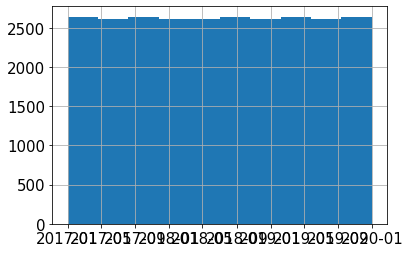

In [57]:
weather_trips["DAYOFSERVICE"].hist()

In [58]:
trips.dtypes

DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
SUPPRESSED                float64
DAYOFWEEK                   int64
HOUR_DEPARTURE            float64
JOURNEY_TIME              float64
dtype: object

In [59]:
trips["HOUR_DEPARTURE"] =  trips["HOUR_DEPARTURE"].astype("int8") 
trips["ACTUALTIME_ARR"] =  trips["ACTUALTIME_ARR"].astype("int64") 
trips["ACTUALTIME_DEP"] =  trips["ACTUALTIME_DEP"].astype("int64") 

In [60]:
trips.loc[trips['HOUR_DEPARTURE']>23]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
2341,2018-03-16,6398188,69,2,88571,86700,88866,87199,NaN,4,24,1667.0
5986,2018-10-10,8029591,68,2,89100,87300,90142,87363,NaN,2,24,2779.0
6097,2018-10-10,8025106,65,2,91024,87300,90404,87293,NaN,2,24,3111.0
7147,2018-04-11,6620098,65,2,90870,87300,90725,87271,NaN,2,24,3454.0
8162,2018-02-18,6263193,68,2,88740,87000,88823,87377,NaN,6,24,1446.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2172752,2018-05-16,6759661,38,2,86390,84600,89667,87797,NaN,2,24,1870.0
2175634,2018-05-27,6845502,68,2,88740,87000,89070,87535,NaN,6,24,1535.0
2178416,2018-05-15,6767648,65,2,90847,87300,90702,87197,NaN,1,24,3505.0
2180117,2018-05-15,6761211,68,2,89100,87300,88575,87247,NaN,1,24,1328.0


Before merging we need to do something about the routes that left after midnight, as these will not automatically have a matching time.

In [61]:
trips['DAYOFSERVICEMERGE'] = trips['DAYOFSERVICE']
trips['HOUR_DEPARTUREMERGE'] = trips['HOUR_DEPARTURE']

In [62]:
# cell takes a while to run

In [63]:
for index, row in trips.iterrows():
    # if 24 then change to midnight and increase day by 1
    if row['HOUR_DEPARTURE'] == 24:
        trips.loc[index,'HOUR_DEPARTUREMERGE'] = 0
        trips.loc[index,'DAYOFSERVICEMERGE']= row['DAYOFSERVICE'] + dt.timedelta(days=1)
#     # day clocks changed
#     if row['DAYOFSERVICE'] == '2018-03-25':
#         print('now')
#         if row['HOUR_DEPARTURE'] == 23:
  
#             print('he')
#             trips.loc[index,'HOUR_DEPARTUREMERGE'] = 0
#             trips.loc[index,'DAYOFSERVICEMERGE']= row['DAYOFSERVICE'] + dt.timedelta(days=1)

In [64]:
# trips.loc

In [65]:
# need to rename weather columns to merge
weather_trips.rename(columns={'DAYOFSERVICE':'DAYOFSERVICEMERGE'},inplace=True)
weather_trips.rename(columns={'HOUR_DEPARTURE':'HOUR_DEPARTUREMERGE'},inplace=True)

In [66]:
# check changes correctly applied
trips.loc[trips['HOUR_DEPARTURE']>23]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,DAYOFSERVICEMERGE,HOUR_DEPARTUREMERGE
2341,2018-03-16,6398188,69,2,88571,86700,88866,87199,NaN,4,24,1667.0,2018-03-17,0
5986,2018-10-10,8029591,68,2,89100,87300,90142,87363,NaN,2,24,2779.0,2018-10-11,0
6097,2018-10-10,8025106,65,2,91024,87300,90404,87293,NaN,2,24,3111.0,2018-10-11,0
7147,2018-04-11,6620098,65,2,90870,87300,90725,87271,NaN,2,24,3454.0,2018-04-12,0
8162,2018-02-18,6263193,68,2,88740,87000,88823,87377,NaN,6,24,1446.0,2018-02-19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2172752,2018-05-16,6759661,38,2,86390,84600,89667,87797,NaN,2,24,1870.0,2018-05-17,0
2175634,2018-05-27,6845502,68,2,88740,87000,89070,87535,NaN,6,24,1535.0,2018-05-28,0
2178416,2018-05-15,6767648,65,2,90847,87300,90702,87197,NaN,1,24,3505.0,2018-05-16,0
2180117,2018-05-15,6761211,68,2,89100,87300,88575,87247,NaN,1,24,1328.0,2018-05-16,0


In [67]:
trips = pd.merge(trips, weather_trips, on=['DAYOFSERVICEMERGE', 'HOUR_DEPARTUREMERGE'], how='left')

In [68]:
trips.isnull().sum()

DAYOFSERVICE                 0
TRIPID                       0
LINEID                       0
DIRECTION                    0
PLANNEDTIME_ARR              0
PLANNEDTIME_DEP              0
ACTUALTIME_ARR               0
ACTUALTIME_DEP               0
SUPPRESSED             1892520
DAYOFWEEK                    0
HOUR_DEPARTURE               0
JOURNEY_TIME                 0
DAYOFSERVICEMERGE            0
HOUR_DEPARTUREMERGE          0
dt                         121
temp                       121
visibility                6538
wind_speed                 121
weather_main               121
weather_description        121
weather_icon               121
dtype: int64

In [69]:
# no need for these now
trips=trips.drop(columns=['DAYOFSERVICEMERGE','HOUR_DEPARTUREMERGE'])

In [70]:
trips.loc[trips['temp'].isna()]

,DAYOFSERVICE,TRIPID,LINEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,dt,temp,visibility,wind_speed,weather_main,weather_description,weather_icon
80872,2018-03-25,6419363,17,2,85494,83100,85456,83102,NaN,6,23,2354.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81916,2018-03-25,6419846,39,2,87021,84600,87401,84620,NaN,6,23,2781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119645,2018-03-25,6418318,29A,1,86407,84600,86389,84594,NaN,6,23,1795.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700688,2018-03-25,6407676,1,1,84975,82800,85472,82842,NaN,6,23,2630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
700713,2018-03-25,6418802,27,2,86568,84600,86609,84607,NaN,6,23,2002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721792,2018-03-25,6412893,42,1,87120,84600,86905,84637,NaN,6,23,2268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722932,2018-03-25,6417340,65,1,86963,83700,87194,83678,NaN,6,23,3516.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722945,2018-03-25,6413040,76,1,86452,84600,86190,84611,NaN,6,23,1579.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
722959,2018-03-25,6413586,27,1,86795,82500,87482,83146,NaN,6,23,4336.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
# nulls = trips['temp'].isnull() | trips['visibility'].isnull() | trips['wind_speed'].isnull() | trips['weather_description'].isnull() | trips['weather_icon'].isnull()


In [72]:
# trips[nulls]

In [73]:
# trips['temp'] = trips['temp'].fillna(-1)
# trips['visibility'] = trips['visibility'].fillna(-1)
# trips['wind_speed'] = trips['wind_speed'].fillna(-1)
# trips['weather_description'] = trips['weather_description'].fillna(-1)
# trips['weather_icon'] = trips['weather_icon'].fillna(-1)

In [74]:
# trips[nulls]

##### Decided to remove all of the rows without weather data as it would cause unnecessary confusion to the model.

In [75]:
trips = trips.dropna(subset=['temp'])

In [76]:
trips.dtypes

DAYOFSERVICE           datetime64[ns]
TRIPID                          int64
LINEID                         object
DIRECTION                       int64
PLANNEDTIME_ARR                 int64
PLANNEDTIME_DEP                 int64
ACTUALTIME_ARR                  int64
ACTUALTIME_DEP                  int64
SUPPRESSED                    float64
DAYOFWEEK                       int64
HOUR_DEPARTURE                   int8
JOURNEY_TIME                  float64
dt                            float64
temp                          float64
visibility                    float64
wind_speed                    float64
weather_main                   object
weather_description            object
weather_icon                   object
dtype: object

- creating column to divide journeys by direction
- using line id instead of route id because it isn't necessary for the basic modelling as we have no stop information in the trips file.

In [77]:
trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)

In [78]:
trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')

In [79]:
print(len(trips['LINE_DIRECTION'].unique().tolist()),'categories')

252 categories


In [80]:
trips = trips.drop({"DIRECTION", "LINEID", "dt"}, axis=1)

I will now remove the top and bottom 2.5% from each LINE_DIRECTION so I am left with 2 standard deviations above and below the mean for each.

In [81]:
trips['JOURNEY_TIME'].isnull().sum()

0

In [82]:
# create a list of all line_directions
allLineDirections = trips['LINE_DIRECTION'].unique().tolist()

In [83]:
## below cell takes quite a while to run

In [84]:
# initialise counter to see how many are removed
removercounter = 0
# loop through direction list
for direction in allLineDirections:
    # create a new dataframe for direction
    subdataframe = trips[trips['LINE_DIRECTION'].isin([direction])]
    mean = subdataframe["JOURNEY_TIME"].mean()
    std2 = 2*subdataframe["JOURNEY_TIME"].std()
    upper = mean + std2
    lower = mean - std2
    # iterate through this dataframe
    for index, row in subdataframe.iterrows():
        # check if time is above/below 2 standard deviations
        if row['JOURNEY_TIME'] > upper or row['JOURNEY_TIME'] < lower:
            # apply change to dfclean, not new dataframe
            trips.loc[index,'JOURNEY_TIME'] = np.nan
            removercounter += 1
    print(direction)

print(removercounter, "journey times removed.")

68_1
45A_2
25A_1
14_1
77A_2
39_2
16_1
40D_1
27B_2
142_2
83_2
130_1
15_1
46A_1
33_1
7_2
39A_1
39A_2
1_2
41_2
67X_1
59_1
9_1
40_1
239_2
130_2
84_1
53_1
185_1
41_1
40D_2
151_1
13_2
15B_1
65B_2
29A_2
33_2
61_1
140_1
123_1
14_2
7_1
79A_1
38A_2
46A_2
31_2
15B_2
69_2
44_2
42_1
67_2
184_1
238_2
145_1
17A_1
83_1
32_1
27A_1
17_2
27X_1
122_2
25A_2
54A_2
66_1
150_1
56A_1
37_2
27_2
27A_2
42_2
15A_2
65_2
123_2
145_2
9_2
150_2
47_1
76_2
79_2
79A_2
83A_1
63_1
33B_1
27B_1
4_1
120_2
41C_1
16_2
70_2
84A_2
220_2
151_2
32X_1
17_1
68A_1
1_1
84X_1
41C_2
38_2
102_2
83A_2
37_1
270_1
77A_1
51X_2
65B_1
76_1
33X_2
75_2
220_1
26_2
270_2
66A_1
29A_1
69_1
31A_1
49_2
111_2
185_2
122_1
18_1
15_2
120_1
11_1
14C_2
67_1
70_1
65_1
33X_1
13_1
40_2
39_1
114_1
26_1
4_2
68_2
75_1
76A_1
44B_2
79_1
31A_2
32_2
140_2
102_1
38A_1
7A_2
43_1
25_2
17A_2
18_2
66_2
104_2
15A_1
11_2
84_2
33A_2
16C_2
238_1
239_1
42D_1
7A_1
38_1
66A_2
25_1
31B_2
66X_2
31D_2
33D_1
27_1
43_2
39X_2
104_1
44_1
184_2
56A_2
31_1
41B_2
61_2
25B_1
53_2
84X_2
67X_

In [85]:
initial = trips.shape[0]
trips = trips.dropna(subset=['JOURNEY_TIME'])
after = trips.shape[0]
print(initial-after, "rows were deleted.")

82702 rows were deleted.


In [86]:
trips = trips.reset_index(drop=True)

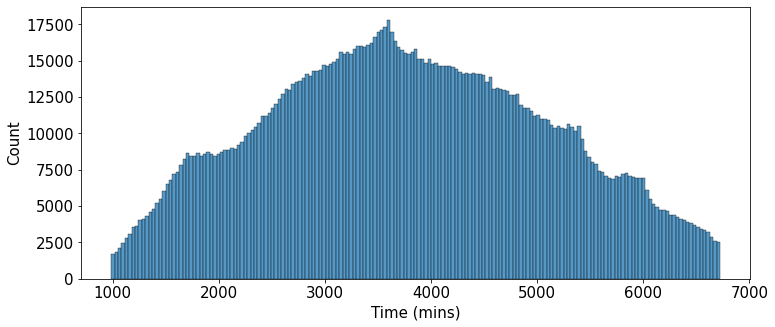

In [87]:
fig, ax = plt.subplots(figsize=(12,5))
sns.set_context(rc={"font.size":15, "axes.titlesize":15, "axes.labelsize":15})
sns.histplot(tripsNoOutliers['JOURNEY_TIME'],kde = False)
plt.xlabel('Time (mins)')

# plt.title('Journey Times - post-cleaning')
plt.show()

##### creating temporry columns to identify outliers 

In [88]:
# trips['planned_journey_time'] = (trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']).apply(lambda row: row/60)
trips['planned_journey_time'] = trips['PLANNEDTIME_ARR'] - trips['PLANNEDTIME_DEP']

In [89]:
trips["error"] = (trips["JOURNEY_TIME"] - trips['planned_journey_time'])

In [90]:
trips

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
0,2018-02-07,6253783,87245,84600,87524,84600,NaN,2,23,2924.0,6.39,9999.0,7.2,Drizzle,light intensity drizzle,09n,68_1,2645,279.0
1,2018-02-07,6254942,35512,32100,36329,32082,NaN,2,8,4247.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,45A_2,3412,835.0
2,2018-02-07,6259460,57261,54420,58463,54443,NaN,2,15,4020.0,4.39,9999.0,5.1,Drizzle,light intensity drizzle,09d,25A_1,2841,1179.0
3,2018-02-07,6248240,41648,37200,42019,37538,NaN,2,10,4481.0,0.39,9999.0,5.7,Clouds,broken clouds,04d,77A_2,4448,33.0
4,2018-02-07,6251760,34768,28920,35709,28929,NaN,2,8,6780.0,-1.61,9999.0,4.1,Clouds,scattered clouds,03d,39_2,5848,932.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1810482,2018-05-14,6765652,30626,29100,30482,29119,NaN,0,8,1363.0,12.39,9999.0,3.6,Clouds,broken clouds,04d,53_2,1526,-163.0
1810483,2018-05-14,6765662,65950,64800,66270,64815,NaN,0,18,1455.0,16.46,9999.0,0.5,Clouds,broken clouds,04d,53_2,1150,305.0
1810484,2018-05-14,6765828,28647,25800,28688,25858,NaN,0,7,2830.0,11.39,9999.0,2.6,Clouds,broken clouds,04d,45A_1,2847,-17.0
1810485,2018-05-14,6765849,61560,57840,61365,57859,NaN,0,16,3506.0,15.46,9999.0,2.6,Clouds,broken clouds,04d,123_2,3720,-214.0


In [91]:
trips.dtypes

DAYOFSERVICE            datetime64[ns]
TRIPID                           int64
PLANNEDTIME_ARR                  int64
PLANNEDTIME_DEP                  int64
ACTUALTIME_ARR                   int64
ACTUALTIME_DEP                   int64
SUPPRESSED                     float64
DAYOFWEEK                        int64
HOUR_DEPARTURE                    int8
JOURNEY_TIME                   float64
temp                           float64
visibility                     float64
wind_speed                     float64
weather_main                    object
weather_description             object
weather_icon                    object
LINE_DIRECTION                category
planned_journey_time             int64
error                          float64
dtype: object

In [92]:
trips.error.max()

4819.0

In [93]:
trips.error.min()

-11053.0

- Average error is 5.57 minutes
- Obviously some incorrect data if a line can be almost 4 hours early
- Top 25 percentile is 10 minutes late.
- Bottom 25 percentile is 16 minutes early.
- Likely that some particular bus lines are very infrequent, with large error (based on my personal experience).
- Don't want to be too strict with outliers as it is likely that there are certain days of the year where long delays are extremely common. eg pride day or saint patrick's day
- Early arrivals will 
###### Decided to set outlier mark at 20 minutes early and late.

#### xing
I think the error will somehow affected by the rush hour, i changed the error selection from 1200 to 1800, the r2 improves 5%

In [94]:
trips[(trips.error > 1800)]

,DAYOFSERVICE,TRIPID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,SUPPRESSED,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,temp,visibility,wind_speed,weather_main,weather_description,weather_icon,LINE_DIRECTION,planned_journey_time,error
60,2018-02-18,6266612,62716,58500,64743,58503,NaN,6,16,6240.0,10.39,9999.0,5.7,Drizzle,light intensity drizzle rain,09d,39_2,4216,2024.0
203,2018-03-11,6391788,37914,34200,41400,34191,NaN,6,9,7209.0,7.39,500.0,4.1,Fog,fog,50d,65_2,3714,3495.0
311,2018-09-28,7760754,35886,31320,38461,31423,NaN,4,8,7038.0,6.46,9999.0,2.6,Clouds,few clouds,02d,15_1,4566,2472.0
418,2018-09-26,7768408,81576,79200,83843,79263,NaN,2,22,4580.0,17.00,9999.0,1.5,Clouds,broken clouds,04n,49_2,2376,2204.0
500,2018-06-26,7114587,71151,67500,73192,67442,NaN,1,18,5750.0,22.39,10000.0,4.6,Clear,sky is clear,01d,4_1,3651,2099.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1809778,2018-05-15,6766978,82295,79200,84594,79206,NaN,1,22,5388.0,9.39,9999.0,6.2,Clouds,scattered clouds,03n,11_1,3095,2293.0
1809986,2018-05-15,6767533,36214,31320,38413,31649,NaN,1,8,6764.0,14.39,9999.0,4.1,Clouds,scattered clouds,03d,15_1,4894,1870.0
1810028,2018-05-15,6751252,30365,26100,32440,26106,NaN,1,7,6334.0,13.39,9999.0,5.1,Clouds,broken clouds,04d,11_1,4265,2069.0
1810292,2018-05-15,6756935,30660,28800,33072,28859,NaN,1,8,4213.0,14.39,9999.0,4.1,Clouds,scattered clouds,03d,31B_2,1860,2353.0


In [95]:
# 20 * 60 = 1200
trips = trips[(trips.error < 1800) & (trips.error > -1800)]


In [96]:
# avoid having to run the above every time
trips.to_csv('./trips_modelling.csv')